In [74]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [75]:
# File to load
data_to_load = "stock_csv/worldtradingdata-history-INTC.csv"

# Read CSV
data = pd.read_csv(data_to_load)

# Create new column with ticker name
data["Ticker"] = "INTC"
data['Change'] = ((data['Open'] - data['Close']) / data['Close'] * 100)

data.head()
# Display preview
data.head()

,Date,Open,Close,High,Low,Volume,Ticker,Change
0,1972-06-28,0.03,0.03,0.03,0.03,0,INTC,0.0
1,1972-06-29,0.03,0.03,0.03,0.03,0,INTC,0.0
2,1972-06-30,0.03,0.03,0.03,0.03,0,INTC,0.0
3,1972-07-03,0.03,0.03,0.03,0.03,0,INTC,0.0
4,1972-07-04,0.03,0.03,0.03,0.03,0,INTC,0.0


In [78]:
Day_max_change = data['Change'].max()
Day_max_change



12.803984764137114

In [79]:
max_date = data[data['Date'].str.match('Change')]
max_date

AttributeError: Can only use .str accessor with string values, which use np.object_ dtype in pandas

In [68]:
Day_min_change = data['Change'].min()
Day_min_change

-11.802512416009336

In [73]:
Day_avg_change = data['Change'].mean()
Day_avg_change

0.0011839771998698454

In [46]:
# Isolate date, open, and close columns from dataframe
date = data["Date"]
open = data["Open"]
close = data["Close"]

# Create the daily change by subtracting the opening price from the closing price
daily_change = close - open

# # Create a dataframe that displays all this information
# daily_change_df = pd.DataFrame({
#     "Date": date,
#     "Daily Change": daily_change
# })
# daily_change_df.head()

In [47]:
# Split the date column 
split_date = data["Date"].str.split("-", n = 1, expand = True) 

# Create a dataframe that displays all this information
daily_change_df = pd.DataFrame({
    "Year": split_date[0],
    "Month-Day": split_date[1],
    "Daily Change": data['Change']
})
daily_change_df.head()

,Year,Month-Day,Daily Change
0,1986,03-13,0.0
1,1986,03-14,0.0
2,1986,03-17,0.0
3,1986,03-18,0.0
4,1986,03-19,0.0


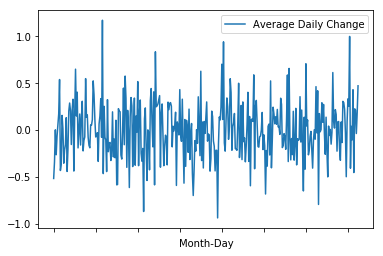

In [48]:
# Find the average daily change for each date
date_change_avg = daily_change_df.groupby(["Month-Day"]).agg({"Daily Change":"mean"})["Daily Change"]

# Change the series to a dataframe
date_change_avg_df = pd.DataFrame({"Average Daily Change": date_change_avg})
date_change_avg_df.plot.line()

In [49]:
# Find the maximum average daily change
max_change = date_change_avg_df["Average Daily Change"].max()
max_change

1.170857326004567

In [50]:
# Find the corresponding date to this maximum average change
max_change_date = date_change_avg_df.loc[date_change_avg_df["Average Daily Change"] == max_change]
max_change_date

,Average Daily Change
Month-Day,
02-29,1.170857


In [42]:
# Find the maximum average daily change
average_change = date_change_avg_df["Average Daily Change"].median()
average_change

0.014959828601133962

In [13]:
# Build a line chart that shows the daily change over time for stock
plt.plot(x_change, y_date)
plt.show()

NameError: name 'x_change' is not defined